In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
from astropy import constants as const
from RK78 import *
from miscellaneous import *
plt.rc('font',family='Times New Roman')

In [2]:
delta_v1,delta_v2, t_transfer = hohmann(1,1.52,GM=1) 
x0 = (1*u.AU).to('km').value
soi_earth = 0.929e6 #radius of soi of earth, km
soi_mars = 0.578e6 #radius of soi of earth, km

Customize the launch height `h_initial` to see the total energy difference between two models. Remember to adjust the value of first acceleration in planet-influenced model to make sure that the spacecraft will land within the SOI of Mars. You can refer to the second plotted figure to see whether your customized spacecraft will land in SOI. 

In [3]:

h_initial = ((7000+6371)*u.km).to('AU').value
v_ini = 1.0+delta_v1

initial_0 = np.array([1.00+h_initial,0,0,0,v_ini,0])

model_2body = {'model':model}
time_earth, results_earth = orbit(initial_0,period=t_transfer*0.01,h=2*np.pi/10000,err=1e-20,**model_2body)

alpha=1.028
theta = np.pi/180*0
initial_0 = np.array([1.00+h_initial,0,0,-v_ini*alpha*np.sin(theta),v_ini*alpha*np.cos(theta),0])

model_nbody = {'model':model_p}
%time time1_earth, results1_earth = orbit(initial_0,period=t_transfer*0.01,h=2*np.pi/1000,err=1e-15,**model_nbody)


Done!
Function returns the time and results sequences in type of python-list.
Remember to transfer them to ndarray and transpose the results!
72
Done!
Function returns the time and results sequences in type of python-list.
Remember to transfer them to ndarray and transpose the results!
7243
CPU times: user 9.51 s, sys: 257 ms, total: 9.76 s
Wall time: 9.58 s


/Users/neptune/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


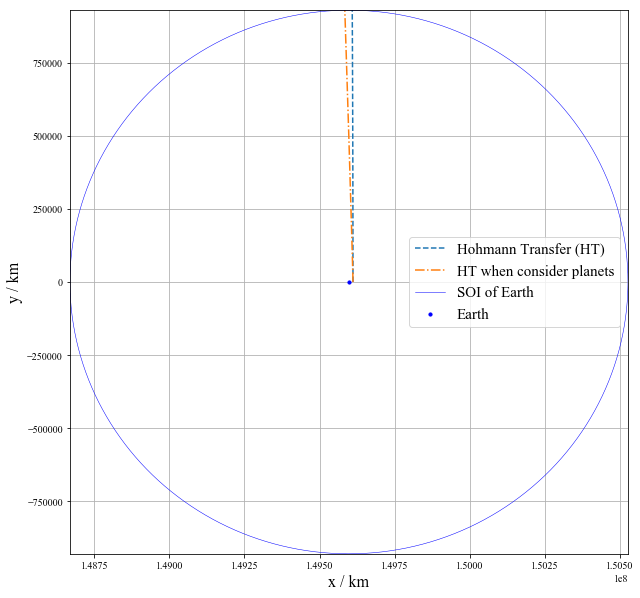

In [4]:
plt.figure(figsize=(10,10))
plt.plot(results_earth[0][:]*x0,results_earth[1][:]*x0,linewidth=1.5,linestyle='--',label='Hohmann Transfer (HT)')
plt.plot(results1_earth[0][:]*x0,results1_earth[1][:]*x0,linewidth=1.5,linestyle='-.',label='HT when consider planets')
plt.grid('on')

plot_circular_orbit(x0=x0,y0=0,r=soi_earth,color='b',label='SOI of Earth')
plt.scatter(1*x0,0,marker='o',c='blue',s=10,zorder=1000,label='Earth')
plt.xlabel('x / km',fontsize=16)
plt.ylabel('y / km',fontsize=16)
plt.xlim([x0-soi_earth,x0+soi_earth])
plt.ylim([-soi_earth,soi_earth])
plt.legend(fontsize=15)
plt.savefig('earth.pdf',dpi=300)

In [5]:
initial = results_earth[:,-1]
time, results = orbit(initial,period=t_transfer,h=np.pi/500,err=1e-7,**model_2body)

initial1 = results1_earth[:,-1]
time1, results1 = orbit(initial1,period=t_transfer*1.1,h=np.pi/500,err=1e-7,**model_nbody)

Done!
Function returns the time and results sequences in type of python-list.
Remember to transfer them to ndarray and transpose the results!
709
Done!
Function returns the time and results sequences in type of python-list.
Remember to transfer them to ndarray and transpose the results!
779


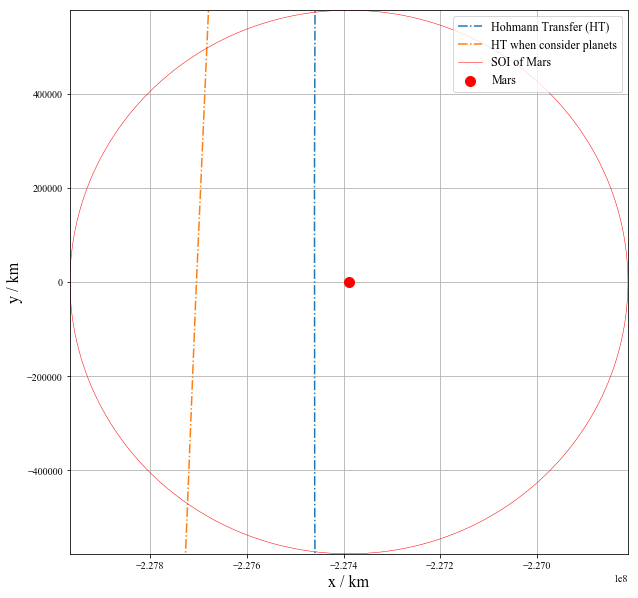

In [6]:
plt.figure(figsize=(10,10))

plt.plot(results[0][:]*x0,results[1][:]*x0,linewidth=1.5,linestyle='-.',label='Hohmann Transfer (HT)')
plt.plot(results1[0][:]*x0,results1[1][:]*x0,linewidth=1.5,linestyle='-.',label='HT when consider planets')
plt.scatter(-1.52*x0,0,marker='o',c='red',s=100,zorder=1000,label='Mars')

plot_circular_orbit(x0=-1.52*x0,y0=0,r=soi_mars,color='r',label='SOI of Mars')
plt.xlabel('x / km',fontsize=16)
plt.ylabel('y / km',fontsize=16)
plt.xlim([-1.52*x0-1*soi_mars,-1.52*x0+1*soi_mars])
plt.ylim([-1*soi_mars,1*soi_mars])
plt.grid(True)
plt.legend(loc='upper right',fontsize=12)
plt.savefig('mars.pdf',dpi=300)

In [7]:
v_mars = np.array([0,-np.sqrt(GM_sun/1.52),0])
r_mars = np.array([-1.52,0,0])
v0 = (get_v(1.*u.AU)).to('km/s')
co1 = closest_point(results)
r_man = co1[:3]
v_man = co1[3:]
v_vector = v_man / np.sqrt(np.sum(np.square(v_man)))
r_m = np.sqrt(np.sum(np.square(r_man-r_mars)))
v_m = np.sqrt(GM_mars/r_m)*v_vector
v_total = delta_v1+ np.sqrt(np.sum(np.square(v_m+v_mars-v_man)))
print('The delta v for standard Hohmann Transfer is:',v_total*v0)

The delta v for standard Hohmann Transfer is: 6.008070959323784 km / s


In [8]:
v_mars = np.array([0,-np.sqrt(GM_sun/1.52),0])
r_mars = np.array([-1.52,0,0])
v0 = (get_v(1.*u.AU)).to('km/s')
co1 = closest_point(results1)
r_man = co1[:3]
v_man = co1[3:]
v_vector = v_man / np.sqrt(np.sum(np.square(v_man)))
r_m = np.sqrt(np.sum(np.square(r_man-r_mars)))
v_m = np.sqrt(GM_mars/r_m)*v_vector
v_total = delta_v1+ np.sqrt(np.sum(np.square(v_m+v_mars-v_man)))
print('The delta v for planet-influenced Hohmann Transfer is:',v_total*v0)

The delta v for planet-influenced Hohmann Transfer is: 6.067932879692531 km / s
